In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
plt.rcParams['figure.dpi'] = 150
import os

In [2]:
file_path = './output_5000.csv'
df = pd.read_csv(file_path)
scores = df['syba_score'].dropna()
input_to_score = {i: j for i,j in zip(df['input'], df['syba_score'])}

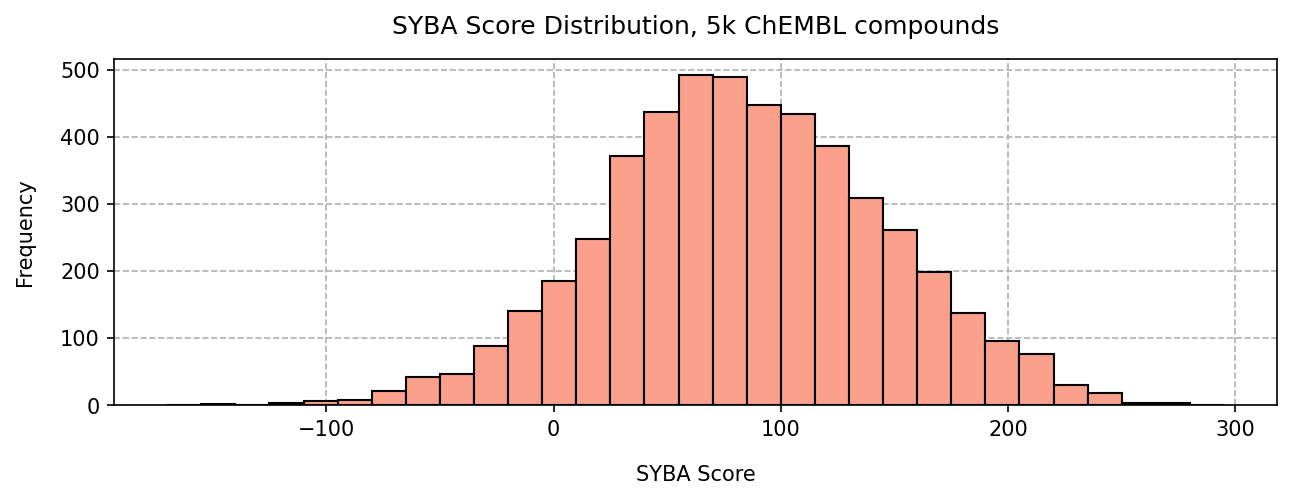

In [7]:
bins = range(-170, 310, 15)
plt.figure(figsize=(10, 3))
plt.hist(scores, bins=bins, edgecolor='black', zorder=2, color='#FAA08B')
plt.title('SYBA Score Distribution, 5k ChEMBL compounds', pad=12)
plt.xlabel('SYBA Score', labelpad=12)
plt.ylabel('Frequency', labelpad=12)
plt.grid(linestyle='--')
plt.savefig("./dist_scores.png", dpi=300)
plt.show()

In [13]:
N = 20

# Top
top = df.sort_values('syba_score', ascending=True)[:N]
for c, (inp, score) in enumerate(zip(top['input'], top['syba_score'])):
    print(c, score)
    mol = Chem.MolFromSmiles(inp)
    AllChem.Compute2DCoords(mol)
    Chem.MolToMolFile(mol, f"{c}.mol")
    cmd = f"./mol2ps --output=svg {c}.mol > ./svg/mol{c}_{round(score, 3)}.svg"
    os.system(cmd)
    os.remove(f"{c}.mol")

# Bottom
bottom = df.sort_values('syba_score', ascending=False)[:N]
for c, (inp, score) in enumerate(zip(bottom['input'], bottom['syba_score'])):
    print(c, score)
    mol = Chem.MolFromSmiles(inp)
    AllChem.Compute2DCoords(mol)
    Chem.MolToMolFile(mol, f"{c}.mol")
    cmd = f"./mol2ps --output=svg {c}.mol > ./svg/mol{c}_{round(score, 3)}.svg"
    os.system(cmd)
    os.remove(f"{c}.mol")

0 -197.45480485360483
1 -174.25778844226593
2 -160.13513902884876
3 -154.95564312678343
4 -146.13020064469998
5 -127.69149435064614
6 -121.18691413917676
7 -116.92614663641513
8 -114.33298732737394
9 -112.76535969533676
10 -109.81325126092035
11 -106.11943098137206
12 -103.85232941170402
13 -98.91492548460864
14 -97.70604570888725
15 -97.20565148109137
16 -95.89409079144669
17 -91.37154631733304
18 -90.19211392594369
19 -89.13392316345693
0 339.7829026930091
1 320.8524577759642
2 295.30144345764035
3 284.2267214423421
4 278.9519386644285
5 275.6191503067016
6 269.93009167349123
7 268.0547347541625
8 264.67414102019313
9 255.11166135980395
10 253.73861897840015
11 250.36831791873897
12 249.53258999102675
13 249.0419154518172
14 248.42071201665095
15 248.33465522342493
16 246.6598640145236
17 245.02464574596283
18 243.5447548834508
19 241.6709210123893
